# Four-Phase Test Pattern

**Problem:** Chaotyczne testy, trudne do zrozumienia.

**Rozwiązanie:** Strukturyzuj każdy test w 4 fazy.

**Analogia:** Jak przepis kulinarny - przygotuj, gotuj, podaj, posprząta.

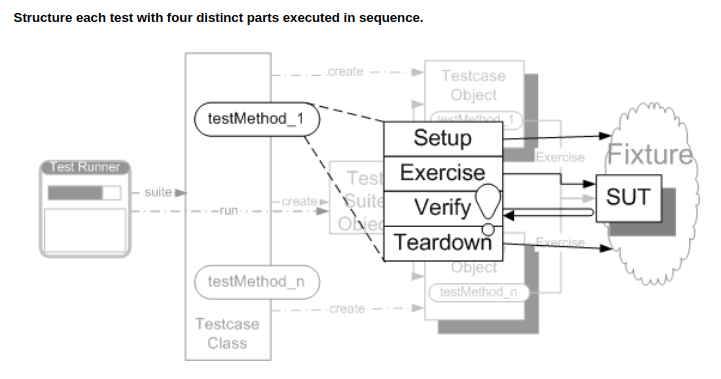

In [ ]:
class Calculator:
    def __init__(self):
        self.result = 0
    
    def add(self, value):
        self.result += value
    
    def get_result(self):
        return self.result

## ❌ Chaotyczny test

In [ ]:
def test_messy():
    calc = Calculator()  # setup?
    calc.add(5)         # exercise?
    assert calc.get_result() == 5  # verify?
    calc.add(3)         # więcej exercise?
    assert calc.get_result() == 8  # więcej verify?
    # Gdzie teardown? Co się właściwie testuje?

## ✅ Four-Phase Test

In [ ]:
def test_add_single_number():
    # 1. SETUP (Arrange) - przygotowanie
    calc = Calculator()
    number_to_add = 5
    
    # 2. EXERCISE (Act) - wykonanie testowanej operacji
    calc.add(number_to_add)
    
    # 3. VERIFY (Assert) - sprawdzenie wyniku
    assert calc.get_result() == 5
    
    # 4. TEARDOWN - sprzątanie (tutaj nie potrzebne)

## Z explicite teardown

In [ ]:
def test_file_operations():
    # 1. SETUP
    filename = "test_file.txt"
    content = "Hello, World!"
    
    # 2. EXERCISE
    with open(filename, 'w') as f:
        f.write(content)
    
    # 3. VERIFY
    with open(filename, 'r') as f:
        assert f.read() == content
    
    # 4. TEARDOWN
    import os
    os.remove(filename)  # Sprzątanie

## Pytest fixture = automatyczny teardown

In [ ]:
import pytest
import tempfile
import os

@pytest.fixture
def temp_file():
    # SETUP
    fd, filename = tempfile.mkstemp()
    os.close(fd)
    
    yield filename  # Przekaż do testu
    
    # TEARDOWN (automatyczny!)
    if os.path.exists(filename):
        os.remove(filename)

def test_with_fixture(temp_file):
    # 1. SETUP (automatyczny przez fixture)
    content = "Test content"
    
    # 2. EXERCISE
    with open(temp_file, 'w') as f:
        f.write(content)
    
    # 3. VERIFY
    with open(temp_file, 'r') as f:
        assert f.read() == content
    
    # 4. TEARDOWN (automatyczny przez fixture)

## AAA = Four-Phase simplified

In [ ]:
def test_aaa_pattern():
    # ARRANGE (Setup)
    calc = Calculator()
    
    # ACT (Exercise)
    calc.add(10)
    
    # ASSERT (Verify)
    assert calc.get_result() == 10
    
    # (Teardown często pomijany w prostych testach)

## Korzyści

- **Czytelność** - jasna struktura
- **Jedność** - jeden test = jedna rzecz
- **Bezpieczeństwo** - deterministyczne sprzątanie

**Zasada:** Jeden test = jedna faza Exercise!